In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

import warnings
import imblearn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm_notebook
from matplotlib.pyplot import figure
from scipy import interpolate

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV


from sklearn import preprocessing

In [2]:
warnings.filterwarnings("ignore")

In [3]:
sns.set_style("whitegrid")

In [4]:
df1 = pd.read_csv('GT1_NEW.csv')
df2 = pd.read_csv('GT2_NEW.csv')


In [5]:
df1 = df1[['apex', 'fqdns',
       'firstseen-pdns', 'lastseen-pdns', 'days count-pdns', 'query count',
       'name servers', 'ns domain', 'soa_domains_nos', 'soa_domain',
       'suspicious_tld', 'length', 'entropy', 'fake_tld', 'brand',
       'pop_keywords', 'similar', 'minus', 'num_subdomains', 'Label',
       'Number_of_total_Scans', 'Number_of_Benign_Scans',
       'apex_marked_malicious', 'domain_marked_malicious',
       'sibling_domain_marked_malicious', 'Number_of_query_parameters',
       'Positive_count', 'Response_code', 'URL_after_redirects', 'resolution',
       'rlength', 'url_length',
       'number of days between firstseen and lastseen', 'Alexa rank (avg)',
       'url','#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path']]

df2 = df2[['apex', 'fqdns',
       'firstseen-pdns', 'lastseen-pdns', 'days count-pdns', 'query count',
       'name servers', 'ns domain', 'soa_domains_nos', 'soa_domain',
       'suspicious_tld', 'length', 'entropy', 'fake_tld', 'brand',
       'pop_keywords', 'similar', 'minus', 'num_subdomains', 'Label',
       'Number_of_total_Scans', 'Number_of_Benign_Scans',
       'apex_marked_malicious', 'domain_marked_malicious',
       'sibling_domain_marked_malicious', 'Number_of_query_parameters',
       'Positive_count', 'Response_code', 'URL_after_redirects', 'resolution',
       'rlength', 'url_length',
       'number of days between firstseen and lastseen', 'Alexa rank (avg)',
       'url','#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path']]


In [6]:
data1 = []
for index, row in df1.iterrows():
    try:
        row.rlength = float(row.rlength)
        data1.append(row)
    except:
        row.rlength = -1
        data1.append(row)
    try:
        row.url_length  = float(row.url_length)
    except:
        row.url_length  = float(len(row.fqdns))
data1 = pd.DataFrame(data1)        

data2 = []
for index, row in df2.iterrows():
    try:
        row.rlength = float(row.rlength)
        data2.append(row)
    except:
        row.rlength = -1
        data2.append(row)
    try:
        row.url_length  = float(row.url_length)
    except:
        row.url_length  = float(len(row.fqdns))
data2 = pd.DataFrame(data2)        

In [7]:
label_encoder = preprocessing.LabelEncoder()

In [8]:
data1['suspicious_tld'] = label_encoder.fit_transform(data1['suspicious_tld'])
data1['Label'] = label_encoder.fit_transform(data1['Label'])
data1['ns domain'] = label_encoder.fit_transform(data1['ns domain'])
data1['soa_domain'] = label_encoder.fit_transform(data1['soa_domain'])

data1['Response_code'] = label_encoder.fit_transform(data1['Response_code'])
data1['URL_after_redirects'] = label_encoder.fit_transform(data1['URL_after_redirects'])

data1['days count-pdns'] = data1['days count-pdns']/( data1['days count-pdns'].max()-data1['days count-pdns'].min())
data1['number of days between firstseen and lastseen'] = data1['number of days between firstseen and lastseen']/(data1['number of days between firstseen and lastseen'].max()-data1['number of days between firstseen and lastseen'].min())

In [9]:
data2['suspicious_tld'] = label_encoder.fit_transform(data2['suspicious_tld'])
data2['Label'] = label_encoder.fit_transform(data2['Label'])
data2['ns domain'] = label_encoder.fit_transform(data2['ns domain'])
data2['soa_domain'] = label_encoder.fit_transform(data2['soa_domain'])

data2['Response_code'] = label_encoder.fit_transform(data2['Response_code'])
data2['URL_after_redirects'] = label_encoder.fit_transform(data2['URL_after_redirects'])

data2['days count-pdns'] = data2['days count-pdns']/( data2['days count-pdns'].max()-data2['days count-pdns'].min())
data2['number of days between firstseen and lastseen'] = data2['number of days between firstseen and lastseen']/(data2['number of days between firstseen and lastseen'].max()-data2['number of days between firstseen and lastseen'].min())

In [10]:
def no_smote(data):
    
    warnings.filterwarnings("ignore")
    
    X_train, X_test, Y_train, Y_test = train_test_split(data[[
        'days count-pdns', 'query count',
       'name servers', 'ns domain', 'soa_domains_nos', 'soa_domain',
       'suspicious_tld', 'length', 'entropy', 'fake_tld', 'brand',
       'pop_keywords', 'similar', 'minus', 'num_subdomains',
       'Number_of_total_Scans', 'Number_of_Benign_Scans',
       'apex_marked_malicious', 'domain_marked_malicious',
       'sibling_domain_marked_malicious', 'Number_of_query_parameters',
       'Positive_count', 'Response_code', 'URL_after_redirects',
       'rlength', 'url_length',
       'number of days between firstseen and lastseen', 'Alexa rank (avg)',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path'
    ]
    ], data.Label, test_size = 0.20, random_state = 0)

    

    RFC = RandomForestClassifier()
    
#     n_estimators = list(range(1,1001,100))
#     max_depth = list(range(1,1001,100))

#     hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
#     h_rfmodel = GridSearchCV(RFC, hyperparameters, cv=5,n_jobs=100, verbose=1)

#     best_logmodel=h_rfmodel.fit(X_train,Y_train)

#     n_estimators = best_logmodel.best_estimator_.get_params()['n_estimators']
#     max_depth = best_logmodel.best_estimator_.get_params()['max_depth']
    
#     RFC = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)

    RFC.fit(X_train,Y_train)
    predictions_RFC = RFC.predict(X_test)
    
    acc = accuracy_score(Y_test,predictions_RFC)
    prec =precision_score(Y_test,predictions_RFC)
    rec = recall_score(Y_test,predictions_RFC)
    
#     print('accuracy : ',acc,' precision : ',prec,' recall : ',rec,'\n')
    return (acc,prec,rec)

In [26]:
A1 =[]
P1 =[]
R1 =[]
DF1 = []
for i in tqdm_notebook(range(20,101)):
    data = data1.sample(frac=i/100, replace=False, random_state=None)
#     print("AC {}\tC {}".format(data.loc[data.Label==1].shape[0],data.loc[data.Label==0].shape[0]))
    a,p,r = no_smote(data)
    A1.append(a)
    P1.append(p)
    R1.append(r)
    DF1.append({
        'size of the data set':data.shape[0],
        'AC count': data.loc[data.Label==1].shape[0],
        'C count': data.loc[data.Label==0].shape[0],
        'size p':(data.shape[0]/data1.shape[0])*100,
        'AC p': (data.loc[data.Label==1].shape[0]/data1.loc[data1.Label==1].shape[0])*100,
        'C p': (data.loc[data.Label==0].shape[0]/data1.loc[data1.Label==0].shape[0])*100,
        'accuracy':a,
        'precision':p,
        'recall':r
    })
    
DF1 = pd.DataFrame(DF1, index = range(20,101))

In [27]:
DF1

,size of the data set,AC count,C count,size p,AC p,C p,accuracy,precision,recall
20,287,137,150,20.000000,19.460227,20.519836,0.913793,0.851852,0.958333
21,301,163,138,20.975610,23.153409,18.878249,0.885246,0.885714,0.911765
22,316,155,161,22.020906,22.017045,22.024624,0.890625,0.818182,0.964286
23,330,156,174,22.996516,22.159091,23.803010,0.848485,0.810811,0.909091
24,344,175,169,23.972125,24.857955,23.119015,0.884058,0.871795,0.918919
...,...,...,...,...,...,...,...,...,...
96,1378,680,698,96.027875,96.590909,95.485636,0.916667,0.929078,0.909722
97,1392,686,706,97.003484,97.443182,96.580027,0.906810,0.880000,0.909091
98,1406,694,712,97.979094,98.579545,97.400821,0.939716,0.908451,0.969925
99,1421,698,723,99.024390,99.147727,98.905609,0.943860,0.937984,0.937984


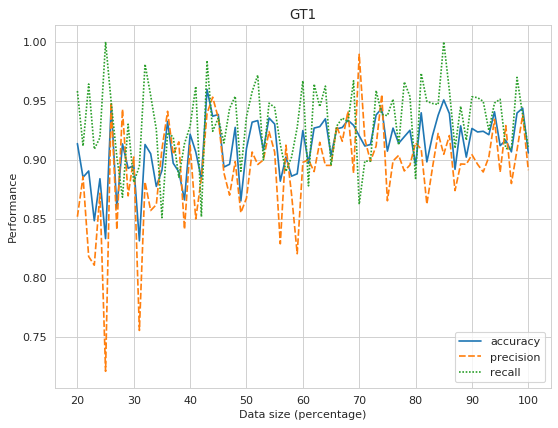

In [28]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig  = sns.lineplot(data=DF1[['accuracy','precision','recall']])
fig.set(xlabel='Data size (percentage)', ylabel='Performance')
fig.set_title('GT1')
plt.show()

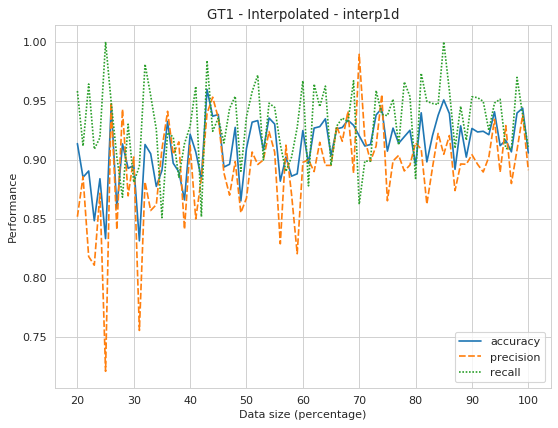

In [29]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig = sns.lineplot(data=pd.DataFrame(
    {
        'accuracy' : interpolate.interp1d(range(20,101),DF1.accuracy)(range(20,101)),
       'precision' :  interpolate.interp1d(range(20,101),DF1.precision)(range(20,101)),
          'recall' : interpolate.interp1d(range(20,101),DF1.recall)(range(20,101))
    },index = range(20,101)))
fig.set_title('GT1 - Interpolated - interp1d')
fig.set(xlabel='Data size (percentage)', ylabel='Performance')
plt.show()

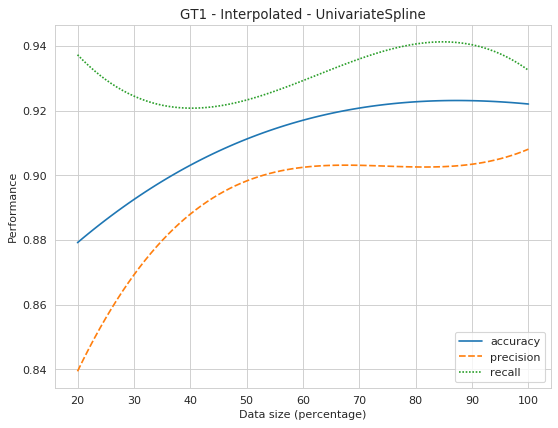

In [30]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig = sns.lineplot(data=pd.DataFrame(
    {
        'accuracy' : interpolate.UnivariateSpline(range(20,101),DF1.accuracy)(range(20,101)),
       'precision' :  interpolate.UnivariateSpline(range(20,101),DF1.precision)(range(20,101)),
          'recall' : interpolate.UnivariateSpline(range(20,101),DF1.recall)(range(20,101))
    },index = range(20,101)))
fig.set_title('GT1 - Interpolated - UnivariateSpline')
fig.set(xlabel='Data size (percentage)', ylabel='Performance')
plt.show()

In [16]:
A2 =[]
P2 =[]
R2 =[]
DF2 = []
for i in tqdm_notebook(range(20,101)):
    data = data2.sample(frac=i/100, replace=False, random_state=1)
#     print("AC {}\tC {}".format(data.loc[data.Label==1].shape[0],data.loc[data.Label==0].shape[0]))
    a,p,r = no_smote(data)
    A2.append(a)
    P2.append(p)
    R2.append(r)
    DF2.append({
        'size of the data set':data.shape[0],
        'AC count': data.loc[data.Label==1].shape[0],
        'C count': data.loc[data.Label==0].shape[0],
        'size p':(data.shape[0]/data2.shape[0])*100,
        'AC p': (data.loc[data.Label==1].shape[0]/data2.loc[data1.Label==1].shape[0])*100,
        'C p': (data.loc[data.Label==0].shape[0]/data2.loc[data1.Label==0].shape[0])*100,
        'accuracy':a,
        'precision':p,
        'recall':r
    })
    
DF2 = pd.DataFrame(DF2, index= range(20,101))

In [17]:
DF2

,size of the data set,AC count,C count,size p,AC p,C p,accuracy,precision,recall
20,284,120,164,20.028209,17.045455,22.969188,0.947368,0.900000,0.947368
21,298,127,171,21.015515,18.039773,23.949580,0.966667,0.962963,0.962963
22,312,131,181,22.002821,18.607955,25.350140,0.968254,0.961538,0.961538
23,326,138,188,22.990127,19.602273,26.330532,0.939394,0.925926,0.925926
24,340,146,194,23.977433,20.738636,27.170868,0.941176,0.961538,0.892857
...,...,...,...,...,...,...,...,...,...
96,1361,560,801,95.980254,79.545455,112.184874,0.970696,1.000000,0.931624
97,1375,567,808,96.967560,80.539773,113.165266,0.981818,0.990385,0.962617
98,1390,572,818,98.025388,81.250000,114.565826,0.967626,0.991525,0.936000
99,1404,578,826,99.012694,82.102273,115.686275,0.985765,1.000000,0.972603


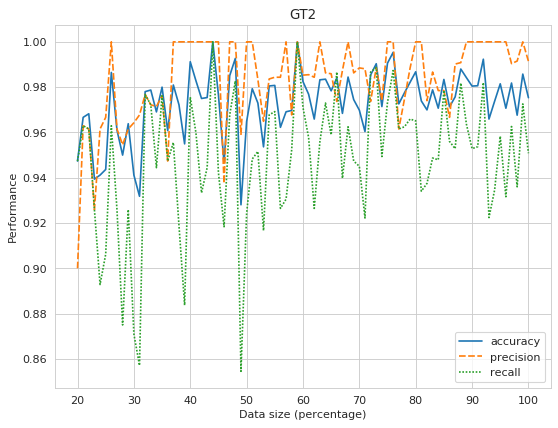

In [18]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig = sns.lineplot(data=DF2[['accuracy','precision','recall']])
fig.set(xlabel='Data size (percentage)', ylabel='Performance')
fig.set_title('GT2')
plt.show()

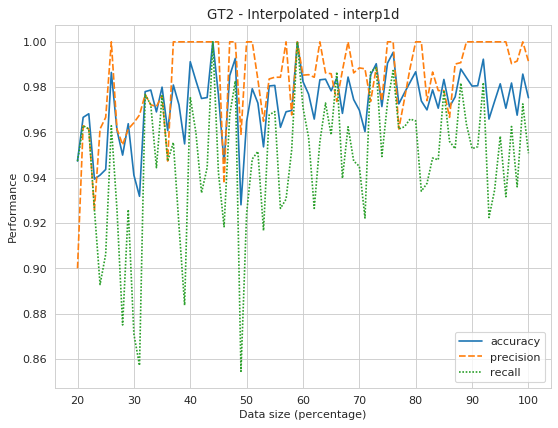

In [19]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig = sns.lineplot(data=pd.DataFrame(
    {
        'accuracy' : interpolate.interp1d(range(20,101),DF2.accuracy)(range(20,101)),
       'precision' :  interpolate.interp1d(range(20,101),DF2.precision)(range(20,101)),
          'recall' : interpolate.interp1d(range(20,101),DF2.recall)(range(20,101))
    },index = range(20,101)))

fig.set(xlabel='Data size (percentage)', ylabel='Performance')
fig.set_title('GT2 - Interpolated - interp1d')
plt.show()

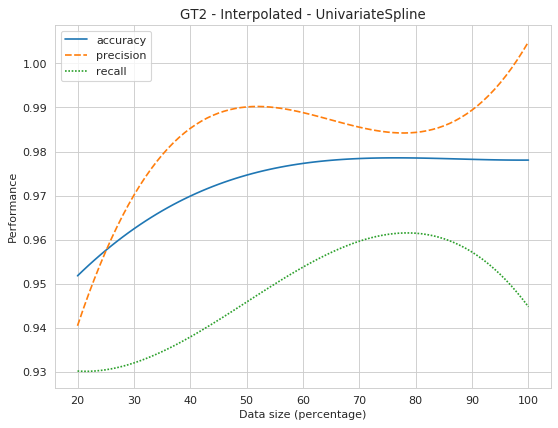

In [20]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig = sns.lineplot(data=pd.DataFrame(
    {
        'accuracy' : interpolate.UnivariateSpline(range(20,101),DF2.accuracy)(range(20,101)),
       'precision' :  interpolate.UnivariateSpline(range(20,101),DF2.precision)(range(20,101)),
          'recall' : interpolate.UnivariateSpline(range(20,101),DF2.recall)(range(20,101))
    },index = range(20,101)))

fig.set(xlabel='Data size (percentage)', ylabel='Performance')
fig.set_title('GT2 - Interpolated - UnivariateSpline')
plt.show()

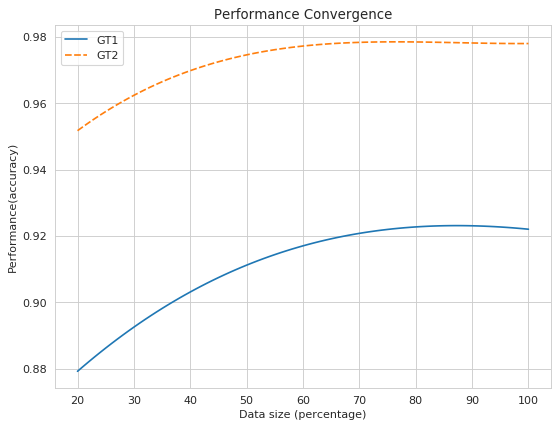

In [33]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig = sns.lineplot(data=pd.DataFrame({
    'GT1':interpolate.UnivariateSpline(range(20,101),DF1['accuracy'])(range(20,101)),
    'GT2':interpolate.UnivariateSpline(range(20,101),DF2['accuracy'])(range(20,101))
},index=range(20,101)))
fig.set(xlabel='Data size (percentage)', ylabel='Performance(accuracy)')
fig.set_title('Performance Convergence')
plt.show()